In [1]:
#!pip install tensorflow-gpu==2.0.0

In [2]:
#!pip uninstall -y tensorflow

In [3]:
# !pip install pydot-ng 
# !pip install graphviz 
# !pip install pydot==1.2.3

In [4]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.0.0
Num GPUs Available:  2


In [5]:
from model import *
from data import *
from datetime import datetime


import tensorflow as tf
tf.__version__

Using TensorFlow backend.


'2.0.0'

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

2 Physical GPUs, 1 Logical GPU


## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [7]:
now = datetime.now()
current_time = now.strftime("%Y/%m/%d_%H:%M")


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(3,'/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/dataset/train_roots','image','label',data_gen_args,save_to_dir = None)

model = unet()
#model.load_weights("/root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/model/model_weight/tooth_roots_bin_fail.hdf5")

model_checkpoint = ModelCheckpoint('/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base//model/model_weight/tooth_roots_bin0720.hdf5'.format(datetime.now().strftime("%Y_%m_%d_%H_%M")), monitor='loss',verbose=1, save_best_only=True)

model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/model/unet/model.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/5
Found 114 images belonging to 1 classes.
Found 114 images belonging to 1 classes.
2000/2000 [==============================] - 221s 111ms/step - loss: 0.2175 - accuracy: 0.9062

Epoch 00001: loss improved from inf to 0.21750, saving model to /home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base//model/model_weight/tooth_roots_bin0720.hdf5
Epoch 2/5
2000/2000 [==============================] - 200s 100ms/step - loss: 0.0922 - accuracy: 0.9607

Epoch 00002: loss improved from 0.21750 to 0.09220, saving model to /home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base//model/model_weight/tooth_roots_bin0720.hdf5
Epoch 3/5
2000/2000 [==============================] - 196s 98ms/step - loss: 0.0637 - accuracy: 0.9724

Epoch 00003: loss improved from 0.09220 to 0.06371, saving model to /home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base//model/model_weight/tooth_roots_bin0720.hdf5
Epoch 4/5
2000/2000 [==============================] - 194s 97ms/step - lo

In [8]:
# model.summary()

### Train with npy file

In [9]:
imgs_train,imgs_mask_train = geneTrainNpy("/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/dataset/train_roots/aug/","/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/dataset/train_roots/aug/")
#model = unet()
#model.load_weights("/root/notebooks/0858611-2/tooth_xray_segmention/unet_base/model/model_weight/tooth_weights_3class_white2020_06_08_19_36.hdf5")

model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])
model.save('/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/model/model_weight/tooth_roots_bin0720.hdf5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 64 samples, validate on 16 samples
Epoch 1/10
64/64 [==============================] - 4s 64ms/step - loss: 0.0293 - accuracy: 0.9874 - val_loss: 0.0351 - val_accuracy: 0.9845

Epoch 00001: loss improved from 0.03722 to 0.02931, saving model to /home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base//model/model_weight/tooth_roots_bin0720.hdf5
Epoch 2/10
64/64 [==============================] - 2s 37ms/step - loss: 0.0301 - accuracy: 0.9871 - val_loss: 0.0378 - val_accuracy: 0.9834

Epoch 00002: loss did not improve from 0.02931
Epoch 3/10
64/64 [==============================] - 3s 44ms/step - loss: 0.0280 - accuracy: 0.9879 - val_loss: 0.0386 - val_accuracy: 0.9837

Epoch 00003: loss improved from 0.02931 to 0.02803, saving model to /home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base//model/model_weight/tooth_roots_bin0720.hdf5
Epoch 4/10
64/64 [==============================] - 3s 39ms/step - loss: 0.0280 - accuracy: 0.9881 - val_loss: 0.0421 - val_accur

### test your model and save predicted results

In [10]:
from model import *
from data import *
from datetime import datetime

import os
import tensorflow as tf
tf.__version__

'2.0.0'

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

2 Physical GPUs, 1 Logical GPU


In [12]:
test_folder = "/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/dataset/test"
result_folder = "/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/dataset/ggggg"

file_list = []
for png in os.listdir(test_folder):
    path = os.path.join(test_folder, png)
    if os.path.isdir(path) or path[-3:]!='PNG':
        continue
    else:
        file_list.append(path)

testGene = testGenerator(test_folder,file_list)
model = unet()
model.load_weights("/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/model/model_weight/tooth_roots_bin0720.hdf5")
#model.load_weights("/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/model/model_weight/tooth_background_bin.hdf5")
results = model.predict_generator(testGene,len(file_list),verbose=1)

saveResult(result_folder,file_list,results)

19/19 [==============================] - 1s 70ms/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

In [13]:

# from tensorflow.keras.utils import plot_model

# plot_model(model,show_shapes = True  )###

In [14]:
# !conda install -y graphviz

In [21]:
import cv2
import matplotlib.pyplot as plt
nums = 2

img_name = file_list[nums].split('/')[-1].split('.')[0]
original_image = cv2.imread('/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/dataset/test/{}.PNG'.format(img_name))
predict_mask = cv2.imread('/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/dataset/ggggg/{}.png'.format(img_name))
#img = cv2.resize(img,(256,256))
#cv2.imwrite('/root/notebooks/0858611-2/unet/unet/data/membrane/3011.png',img)
print(original_image.shape)
print(predict_mask.shape)

predict_mask = cv2.resize(predict_mask,(original_image.shape[1],original_image.shape[0]),interpolation=cv2.INTER_CUBIC)
predict_mask = predict_mask
add_image = cv2.add(original_image,predict_mask)

(617, 803, 3)
(256, 256, 3)


In [22]:
# import cv2
# import matplotlib.pyplot as plt
# nums = 2

# img_name = file_list[nums].split('/')[-1].split('.')[0]
# print(img_name)
# original_image = cv2.imread('/home/jingping/aiforge/tooth_countour/tooth_PBL_detection/Processing_dir/resize_256/NN_130821_152420_C0353A.PNG')
# predict_mask = cv2.imread('/home/jingping/aiforge/tooth_countour/tooth_PBL_detection/Processing_dir/roots_unet_mask/NN_130821_152420_C0353A.png')
# #img = cv2.resize(img,(256,256))
# #cv2.imwrite('/root/notebooks/0858611-2/unet/unet/data/membrane/3011.png',img)
# print(original_image.shape)
# print(predict_mask.shape)

# predict_mask = cv2.resize(predict_mask,(original_image.shape[1],original_image.shape[0]),interpolation=cv2.INTER_CUBIC)
# predict_mask = predict_mask
# add_image = cv2.add(original_image,predict_mask)

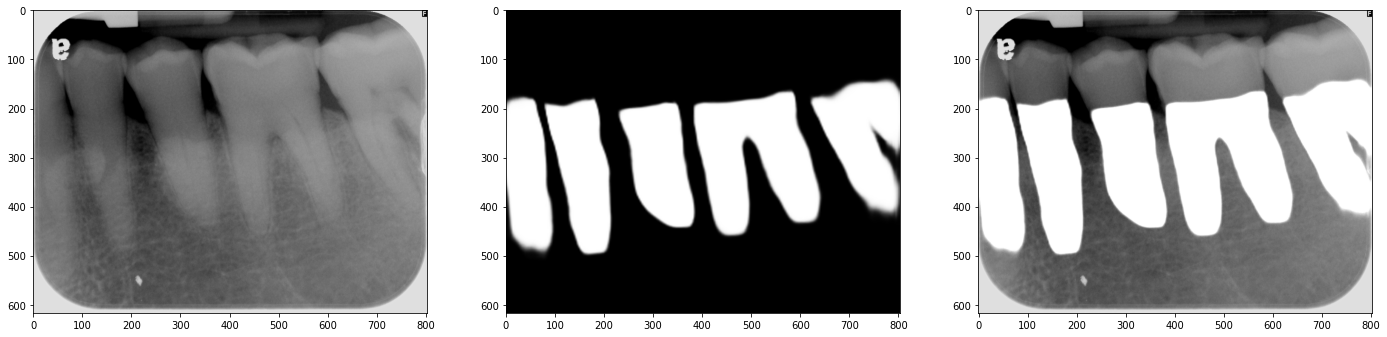

In [23]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
plt.imshow(original_image)
plt.subplot(1,3,2)
plt.imshow(predict_mask)
plt.subplot(1,3,3)
plt.imshow(add_image)

In [ ]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
plt.imshow(original_image)
plt.subplot(1,3,2)
plt.imshow(predict_mask)
plt.subplot(1,3,3)
plt.imshow(add_image)

In [ ]:
import os 
import shutil

path = '/home/jingping/aiforge/tooth_xray_segmention_for_test/unet_base/dataset/train_roots/image'
#path = '/root/notebooks/0858611-2/tooth_xray_segmention/unet_base/dataset/train_3class_white/image'

for file_name in os.listdir(path):
    #print(file_name)
    if os.path.isdir(os.path.join(path, file_name)):
        print(os.path.join(path, file_name))
        shutil.rmtree(os.path.join(path, file_name))